<a href="https://colab.research.google.com/github/dp1706/Machine-Learning/blob/master/LDA_for%20Dimensionality%20Reduction%20/Dimensionality_Reduction_Using_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#@title ABOUT {display-mode: "form"}
print("=====================================================================================================================")
print("*                                                                                                                   *")
print("*   DATASET : IRIS                                                                                                  *")
print("*   Method : Fishar LDA                                                                                             *")
print("*                                                                                                                   *")
print("=====================================================================================================================")

*                                                                                                                   *
*   DATASET : IRIS                                                                                                  *
*   Method : Fishar LDA                                                                                             *
*                                                                                                                   *


<h1></h1>

__Algorithm Steps :__

  1. Compute mean vectors  $m_{i} \epsilon R^D$ for all $c$ classes.
  2. Compute scatter matrices $S_W$(with in class), $S_B$(between class)
  3. Compute eigenvectors and eigenvalues for the Scatter Matrix( $S_W^-1 S_B$) (maximizing the ratio of $S_B / S_W$)
  4. Select $k$ eigenvectors $w_i$ with the largest eigenvalues to form a     $D \times k$ -dimensional matrix  $ W = [w_1, . . . , w_k]$
  5. Project samples onto the new subspace using $W$ and compute the
new coordinates as $Y = XW$
    * $X \epsilon R^{n \times D}: i^{th}$ row represents the $i^{th}$ sample
    * $ Y \epsilon  R^{n \times k} :$ Coordinate matrix of the $n$ data points w.r.t. eigenbasis
$W$ spanning the $k$-dimensional subspace
    * $W \epsilon R^{D \times k}$


<h1></h1>

<img src='https://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/iris_petal_sepal.png' width='300' height='300'></img>
  * Dataset has : 
    * The iris dataset contains measurements for 150 iris flowers from three different species.

    * The three classes in the Iris dataset:

      * Iris-setosa (n=50)
      * Iris-versicolor (n=50)
      * Iris-virginica (n=50)

    * The four features of the Iris dataset:

      * sepal length in cm
      * sepal width in cm
      * petal length in cm
      * petal width in cm


<h1><span style="color:pink">Module</span></h1>

In [2]:
""" Importing libraries """

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
sns.set_style(style='white')
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
np.set_printoptions(precision=4)

<h1>DataSet</h1>

In [4]:
""" loading dataset """

dataset = load_iris()
print("Dataset Shape : ",dataset.data.shape)
print("Dataset Classes Shape : ",dataset.target.shape)

Dataset Shape :  (150, 4)
Dataset Classes Shape :  (150,)


<h1></h1>

In [5]:
""" dataset feature and classes """

print("Dataset Features : ",dataset.feature_names)
print("Dataset Classes : ",dataset.target_names)

Dataset Features :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Dataset Classes :  ['setosa' 'versicolor' 'virginica']


<h1></h1>

In [6]:
""" features """

X = pd.DataFrame(dataset.data , columns=dataset.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<h1></h1>

In [7]:
""" Classes """

Y = pd.DataFrame(dataset.target,columns=['class'])
Y.head()

,class
0,0
1,0
2,0
3,0
4,0


<h1></h1>

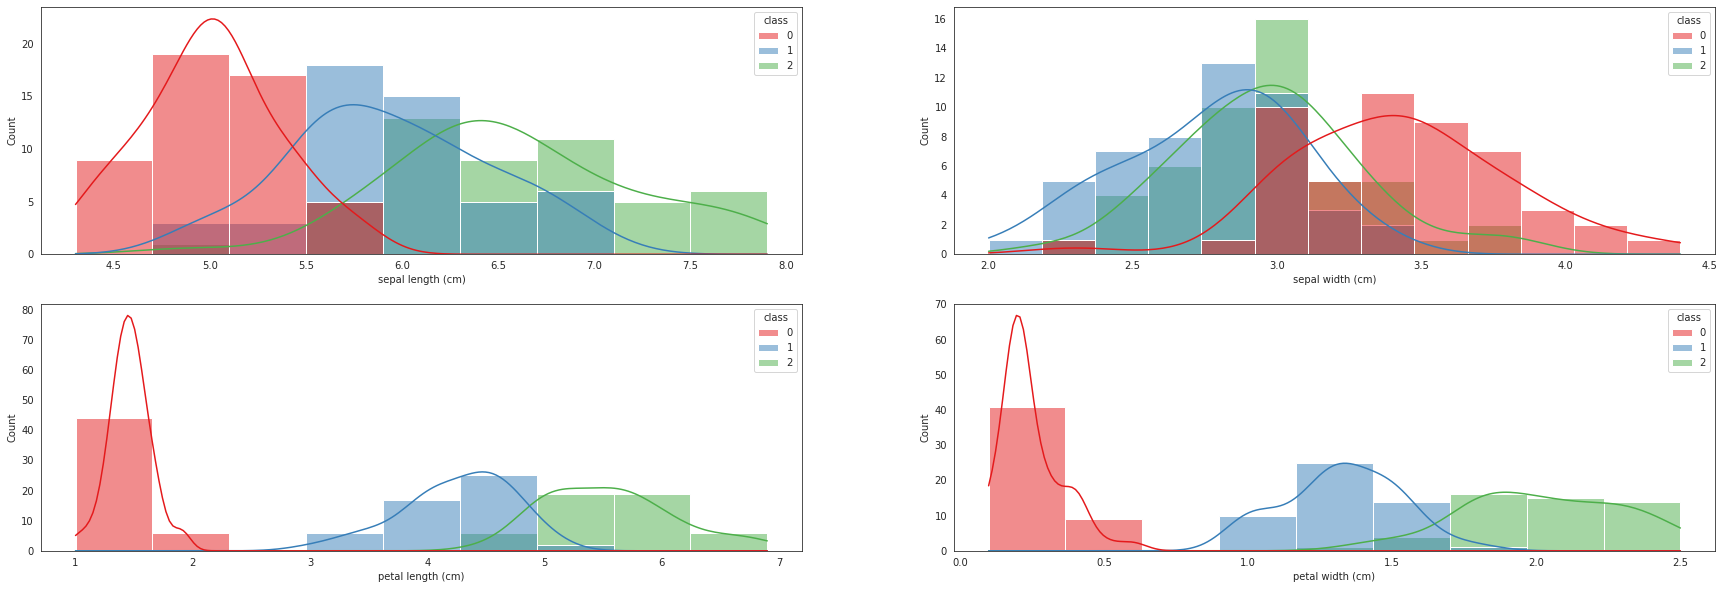

In [8]:
""" plotting features """

fig ,  axes = plt.subplots(2,2 , figsize=(30,10))
sns.histplot(data=X.join(Y),x='sepal length (cm)',legend=True,kde=True,ax=axes[0,0],hue='class',palette='Set1')
sns.histplot(data=X.join(Y),x='sepal width (cm)',legend=True,kde=True,ax=axes[0,1],hue='class',palette='Set1')
sns.histplot(data=X.join(Y),x='petal length (cm)',legend=True,kde=True,ax=axes[1,0],hue='class',palette='Set1')
sns.histplot(data=X.join(Y),x='petal width (cm)',legend=True,kde=True,ax=axes[1,1],hue='class',palette='Set1')
plt.show()

<h1></h1>

In [9]:
""" classes values """

y = Y['class'].values

<h1>Algorithm</h1>

<h4> <b>1. Computing the d-dimensional mean vectors</b></h4>

<h1></h1>

 $X = \begin{bmatrix} 
          x_{1_{\text{sepal length}}} & x_{1_{\text{sepal width}}} & x_{1_{\text{petal length}}} & x_{1_{\text{petal width}}}\\
x_{2_{\text{sepal length}}} & x_{2_{\text{sepal width}}} & x_{2_{\text{petal length}}} & x_{2_{\text{petal width}}}\\
x_{150_{\text{sepal length}}} & x_{150_{\text{sepal width}}} & x_{150_{\text{petal length}}} & x_{150_{\text{petal width}}}\\
\end{bmatrix}, \;\; $
$ y = \begin{bmatrix} \omega_{\text{setosa}}\\
\omega_{\text{setosa}}\\
...  \\
\omega_{\text{virginica}}\end{bmatrix} %]] $
\
\
$ m_i = \begin{bmatrix}
\mu_{\omega_i (\text{sepal length)}}\\
\mu_{\omega_i (\text{sepal width})}\\
\mu_{\omega_i (\text{petal length)}}\\
\mu_{\omega_i (\text{petal width})}\\
\end{bmatrix} \; , \quad \text{with} \quad i = 1,2,3 $

\


  * $m_i$ is a mean_vector

<h1></h1>

In [10]:
""" Calculating mean of each Feature with each class """
 
mean_vector = np.zeros((3,4))

for i in Y['class'].unique():
  mean_vector[i,:] = np.mean(X[ y == i ] , axis=0)

<h1></h1>

In [11]:
""" Calculated Mean Vector """

mean_vector

array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

<h1></h1>

<h4><b>2. Computing the Scatter Matrices</b></h4>

<h1></h1>

  1. __within-class :__

  $ S_W =  \displaystyle\sum_{i=1}^{c} S_i $

  Where 

    * $ S_i = \displaystyle\sum_{x \epsilon D_i}^{n} (x - m_i) (x - m_i)^T $

    And $m_i$ is a mean Vector

    * $ S_i = {1/n_i} \times \displaystyle\sum_{x \epsilon D_i}^{n} x_k $


  2. __Between Class :__

    $ S_B = \displaystyle\sum_{i=1}^{c} N_i \times (m_i - m) (m_i - m)^T $
      * $m$ is Overall Mean

      * $m_i$ is mean_vector for $i$

      * $N_i$ is Size of Class


 <h1></h1>

* __Within Class__

In [12]:
""" Calculating Scatter Matrix For within class """

scatter_w = np.zeros((4,4))

for cl , mv in zip(range(0,4),mean_vector):
  class_sc_mat = np.zeros((4,4))
  for row in X[y == cl].values:
    row , mv = row.reshape(4,1) , mv.reshape(4,1)
    class_sc_mat += (row - mv ).dot((row - mv ).T) 
  scatter_w += class_sc_mat

<h1></h1>

In [13]:
""" Calculated Scatter_w matrix """

scatter_w

array([[38.9562, 13.63  , 24.6246,  5.645 ],
       [13.63  , 16.962 ,  8.1208,  4.8084],
       [24.6246,  8.1208, 27.2226,  6.2718],
       [ 5.645 ,  4.8084,  6.2718,  6.1566]])

<h5></h5>

* __Between Classes__

In [14]:
""" Calculating Scatter Matrix For Between Class """

Total_mean  = X.mean().values

scatter_b = np.zeros((4,4))

for index , val in enumerate(mean_vector):
  n = X[ y == index].values.shape[0]
  val = val.reshape(4,1)
  total_mean = Total_mean.reshape(4,1)
  scatter_b += n * (val - total_mean).dot((val - total_mean).T) 

<h1></h1>

In [15]:
""" Calculated Scatter Matrix For Between Class """

scatter_b

array([[ 63.2121, -19.9527, 165.2484,  71.2793],
       [-19.9527,  11.3449, -57.2396, -22.9327],
       [165.2484, -57.2396, 437.1028, 186.774 ],
       [ 71.2793, -22.9327, 186.774 ,  80.4133]])

<h1></h1>

<h4><b>3. Finding EigenVector and EigenValues</b></h4>

<h1></h1>

In [16]:
""" Calculating Eigen Vector and Eigen Value """

A = np.linalg.inv(scatter_w).dot(scatter_b)
eigen_val , eigen_vect = np.linalg.eig(A)

<h1></h1>

In [17]:
""" Eigen Vectors """

for i in range(len(eigen_val)):
  print("Eigen Vector : {}".format(i))
  print(eigen_vect[:,i].reshape(4,1).real)
  print()

Eigen Vector : 0
[[-0.2087]
 [-0.3862]
 [ 0.554 ]
 [ 0.7074]]

Eigen Vector : 1
[[-0.0065]
 [-0.5866]
 [ 0.2526]
 [-0.7695]]

Eigen Vector : 2
[[-0.1416]
 [-0.2125]
 [-0.2703]
 [ 0.6927]]

Eigen Vector : 3
[[-0.1416]
 [-0.2125]
 [-0.2703]
 [ 0.6927]]



In [18]:
""" Eigen Values """

for i in range(len(eigen_val)):
  print("Eigen Value : {}".format(i))
  print(eigen_val[i].real)
  print()

Eigen Value : 0
32.191929198278025

Eigen Value : 1
0.28539104262306647

Eigen Value : 2
-2.8907453147977534e-15

Eigen Value : 3
-2.8907453147977534e-15



<h1></h1>

<h4><b>4. Selecting linear discriminants for the new feature subspace</b></h4>

<h1></h1>

* __Sorting the eigenvectors by decreasing eigenvalues__

In [19]:
""" Sorting Eigen pair (eigen value , eigen vector ) 
    based of decreasing value of eigen value 
"""
eigen_pair = [(np.abs(eigen_val[i]),eigen_vect[:,i]) for i in range(len(eigen_val))] 
eigen_pair = sorted(eigen_pair,key=lambda x : x[0],reverse=True)

<h1></h1>

In [20]:
""" Sorted Eigen Values """

for index , i in enumerate(eigen_pair):
  "Sorted Eigen Values in Desecending Order"
  print("Eigen Value  : {}".format(index))
  print(i[0])
  print()

Eigen Value  : 0
32.191929198278025

Eigen Value  : 1
0.28539104262306647

Eigen Value  : 2
3.7355530009793716e-15

Eigen Value  : 3
3.7355530009793716e-15



In [21]:
""" if we Check variance """

val_sum = sum(eigen_val)
for index , i in enumerate(eigen_pair):
  print("For Eigen Value  : {} Variance is : {:.2f}% ".format(index,(i[0]/val_sum).real*100))
  print()

For Eigen Value  : 0 Variance is : 99.12% 

For Eigen Value  : 1 Variance is : 0.88% 

For Eigen Value  : 2 Variance is : 0.00% 

For Eigen Value  : 3 Variance is : 0.00% 



<h1></h1>

* __Choosing k eigenvectors with the largest eigenvalues__

In [22]:
""" Taking k=2 largest Eigen vactor from Sorted Eigen Pair """

W = np.column_stack((eigen_pair[0][1],eigen_pair[1][1]))
W.real

array([[-0.2087, -0.0065],
       [-0.3862, -0.5866],
       [ 0.554 ,  0.2526],
       [ 0.7074, -0.7695]])

<h1></h1>

<h4><b>5. Transforming the samples onto the new subspace</b></h4>

  __Projection :__ 
  
  $ Y = XW$

<h1></h1>

In [23]:
""" New Subspace """

new_samples = X.dot(W)
assert new_samples.shape == (150,2), "Wrong Dimension"

<h1></h1>

In [24]:
""" new dimensions Values """

new_samples.columns= ['lda1','lda2']
new_samples.head()

,lda1,lda2
0,-1.499210+0.000000j,-1.886754+0.000000j
1,-1.264360+0.000000j,-1.592143+0.000000j
2,-1.355253+0.000000j,-1.733415+0.000000j
3,-1.184956+0.000000j,-1.623588+0.000000j
4,-1.516956+0.000000j,-1.944762+0.000000j


<h1></h1>

In [37]:
""" Classes """

labels = {0:'Setosa' , 1:'Versicolor',2:'Virginica'}

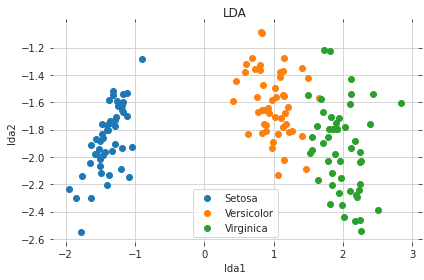

In [38]:
""" Plotting our New Feature Subspace """

ax = plt.subplot(111)
for c in np.unique(y):
  plt.scatter(new_samples.iloc[:,0:1].values.real[y==c],new_samples.iloc[:,1:2].values.real[y==c],label = labels[c],cmap='hot')

plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)   
plt.legend(loc='lower center',fancybox=True)
plt.grid()
plt.xlabel('lda1');plt.ylabel('lda2');plt.title('LDA')
plt.tight_layout()
plt.show()

<h1></h1>

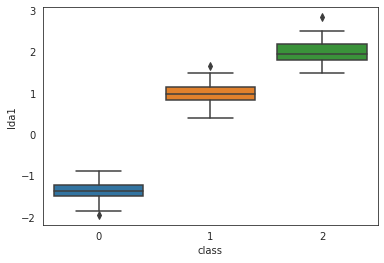

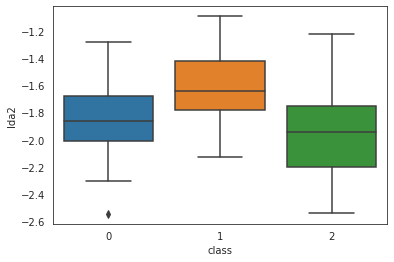

In [35]:
""" Box Plot """

plt.subplot(1,1,1)
sns.boxplot(data=new_samples.join(Y),x='class',y='lda1')
plt.show()
plt.subplot(1,1,1)
sns.boxplot(data=new_samples.join(Y),x='class',y='lda2')
plt.show()

<h1></h1>

<h1>Using Scikit-Learn Library</h1>

<h1></h1>

In [29]:
""" Importing Library """

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

<h1></h1>

In [30]:
""" Fit and Transform """

sklearn_lda = LDA(n_components=2,solver='eigen')
X_lda = sklearn_lda.fit_transform(X, Y['class'])

<h1></h1>

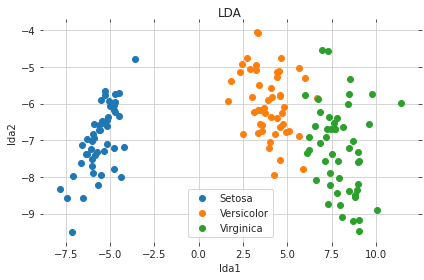

In [40]:
""" Plotting New Feature Subspace Created By Scikit learn Inbuilt Function """

ax = plt.subplot(111)
for c in Y['class'].unique():
  plt.scatter(X_lda[:,0:1].real[y==c] * -1,X_lda[:,1:2].real[y==c] * -1,label=labels[c],cmap='cool')

plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)   
plt.grid()
plt.legend(loc='lower center')
plt.xlabel('lda1');plt.ylabel('lda2');plt.title('LDA')
plt.tight_layout()
plt.show()

<h1></h1>

In [32]:
""" print the ratio of explained features  """

sklearn_lda.explained_variance_ratio_

array([0.9912, 0.0088])

<h6>Thanks</h6> 